## The table of contents
### 1. Summary
### 2. Data preparation
### 3. Data processing, including cleaning
### 4. Data analysis
### 5. Recommendations




### 1. Summary

This notebook was created for Google Data Analytics Capstone (Track B).

### Acknowledgements:
The notebook is based on the following kaggle dataset: lego-sets by user MATTIETERZOLO, which was scraped from official lego website.

I am going to analyze data from lego website, which contains information about the available sets and their characteristics (piece count), their prices, difficulty levels and user ratings.
This analyze could be potentially useful for Lego Company itself, offering insight in factors influencing the price, which can be then helpful when making decision about the prices of new and existing sets. I would also like to discuss further data sources that could be potentially useful for this analysis.

The analysis will be created using Python 3, including data-related libraries (pandas, numpy, matplotlib, seaborn).


Deliverables:
1. A summary is the business task
2. A description of the data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualizations and key findings
6. A list of additional deliverables helpful to include for further exploration
7. Insights based on your analysis


## 2. Data preparation
This part will contain the initial analysis of the dataset, discovering data characteristics and identifying potential issues with the data.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:
df = pd.read_csv('../data/lego_sets.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


The data was stored as Pandas dataframe (df). The info() function allowed us to have a peek into data, including the size of the dataset, the types of the variables and the number of null values. As seen above, 6 columns (num_reviews, play_star_rating, prod_desc, review_difficulty,star_rating and val_star_rating, theme_name) contain null values. In case of num_reviews, play_star_rating,review_difficulty, star_rating and val_star_rating the number of null values amounts to 13%-17% of the whole dataset. In case of prod_desc it is 3%, in case of theme_name it is less than 1%.
Further insights into the data will help decide which columns will be used for analysis.

It is also worth noting that the dataset does not include the sales of the lego sets, nor the costs of production.

In [4]:
df.head(10)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US
5,12+,59.99,7.0,597.0,3.7,Celebrate Shanghai with this LEGO® Architectur...,21039.0,Recreate Shanghai in China's blend of historic...,Average,Shanghai,4.9,Architecture,4.4,US
6,12+,59.99,37.0,598.0,3.7,Celebrate New York City with this LEGO® Archit...,21028.0,Celebrate the architectural diversity of New Y...,Average,New York City,4.2,Architecture,4.1,US
7,12+,49.99,24.0,780.0,4.4,Recreate Buckingham Palace with LEGO® Architec...,21029.0,Build a LEGO® brick model of London's official...,Average,Buckingham Palace,4.7,Architecture,4.3,US
8,12+,39.99,23.0,468.0,3.6,Celebrate London with this LEGO® Architecture ...,21034.0,Celebrate the architectural diversity of Londo...,Average,London,4.7,Architecture,4.1,US
9,12+,39.99,11.0,444.0,3.6,Celebrate Chicago with this LEGO® Architecture...,21033.0,Recreate Chicago’s blend of historical and mod...,Average,Chicago,4.8,Architecture,4.5,US


Further analysis will be conducted on chosen individual columns

In [5]:
df['ages'].value_counts()

ages
6-12     1476
7-14     1421
8-14     1180
4-7       957
5-12      911
10+       870
2-5       840
7-12      723
9-14      624
16+       420
8-12      350
4-99      311
12+       298
6-14      233
8+        226
1½-3      213
14+       212
10-21     184
10-16     148
6+        148
1½-5      113
9-16       92
5+         71
11-16      66
9-12       46
12-16      42
5-8        21
9+         21
4+         21
10-14      21
7+          2
Name: count, dtype: int64

In [6]:
df['review_difficulty'].value_counts()

review_difficulty
Easy                4236
Average             3765
Very Easy           1139
Challenging         1058
Very Challenging       8
Name: count, dtype: int64

In [7]:
df['country'].value_counts()

country
US    817
CA    815
NL    576
GB    576
AT    575
DN    575
AU    570
IE    569
CH    568
FR    568
BE    566
NZ    565
IT    550
LU    549
NO    549
FI    549
ES    549
DE    549
CZ    549
PT    547
PL    530
Name: count, dtype: int64

Notes: it is worth noting that column ages always contains the information about the minimal age, but not always about the maximal age. It is possible to extract the minimum age for further analysis.
Column review difficulty is saved as object type. It can also be transformed into float type, assigning the values to categories based on the difficulty level.
Column country contains the country codes. However, it is not clear whether it has any impact on the price offered. 

In [8]:
pd.DataFrame(df['list_price'].describe())

,list_price
count,12261.000000
mean,65.141998
std,91.980429
min,2.272400
25%,19.990000
50%,36.587800
75%,70.192200
max,1104.870000


In [9]:
pd.DataFrame(df['num_reviews'].describe())

,num_reviews
count,10641.000000
mean,16.826238
std,36.368984
min,1.000000
25%,2.000000
50%,6.000000
75%,13.000000
max,367.000000


In [10]:
pd.DataFrame(df['piece_count'].describe())

,piece_count
count,12261.000000
mean,493.405921
std,825.364580
min,1.000000
25%,97.000000
50%,216.000000
75%,544.000000
max,7541.000000


Both list_price and piece_count do not have any null values. Column list_price changes from 2 to 1104. Column piece_count moves between 1 and 7541. 
Column num_reviews changes from 1 to 367. However, it is worth noting than this column contains 13% of null values.

In further analysis, it will be investigated whether the existence of missing values in one column coincides with missing values in the rest of the columns.

In [11]:
missing_columns = df[["num_reviews","play_star_rating","review_difficulty","star_rating","val_star_rating"]]
missing_columns

,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
0,2.0,4.0,Average,4.5,4.0
1,2.0,4.0,Easy,5.0,4.0
2,11.0,4.3,Easy,4.3,4.1
3,23.0,3.6,Average,4.6,4.3
4,14.0,3.2,Challenging,4.6,4.1
...,...,...,...,...,...
12256,6.0,4.4,Easy,4.3,4.2
12257,8.0,4.1,Easy,3.6,4.1
12258,18.0,4.6,Easy,4.6,4.5
12259,1.0,5.0,Very Easy,5.0,5.0


In [12]:
missing_columns[missing_columns.isnull().any(axis=1)]

,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
22,1.0,NaN,NaN,5.0,NaN
32,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
55,1.0,5.0,NaN,5.0,5.0
69,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
12136,NaN,NaN,NaN,NaN,NaN
12137,NaN,NaN,NaN,NaN,NaN
12196,NaN,NaN,NaN,NaN,NaN
12214,1.0,5.0,NaN,5.0,5.0


It can be assumed that the existence of missing values in num_reviews, review_difficulty, play_star_rating, star_rating and val_star_rating is coincidental.

### Potential data limitations
1. This dataset does not include any information about the relation between country and the price offered (including adjustments for the currency). For simplification it will be assumed that all prices are in USD.
2. There is no information on the exact date when the data was scraped, for instance whether it was obtained during Christmas time. Products like toys tend to be greatly affected by seasonal demand.
3. The dataset includes 3 types of ranking: play_star_rating,star_rating,value_star_rating, but the description of the ratings is not sufficient.
4. Five columns contain about 13-17% of null values. The removal of such values or replacing them with e.g. average may lead to biased values.
5. The data is not current (as it was collected six years ago).

The question that could be asked at this point:
1. Is it possible to obtain a new version of data from lego website, containing all values?
2. Is it possible to obtain additional information about sales and costs?
3. Is it possible to obtain clarification when it comes to countries/currencies and various types of rankings?
4. Would it be possible to obtain clarification for the reason of null values?

### 3. Data processing, including cleaning

Despite some aforementioned data limitations, this analysis will be carried out. Please note that some issues addressed cannot be resolved in this case study. For stronger analysis in the real-life situation it would be recommended to solve the issues first before moving to this step.

In this part, the data will be transformed:
- additional columns will be added (minimal age, length of product description, review_difficulty as value, region based on country code)
- columns unnecessary for further analysis will be dropped,
- missing values would be transformed or removed.

In [13]:
lego_df = df.copy(deep=True)
lego_df["description_length"] = lego_df['prod_long_desc'].str.len()

In [14]:
lego_df['minimum_age'] = lego_df['ages'].astype(str).str[0:2]


Column minimum_age will require further transformations

In [15]:
lego_df['minimum_age'].value_counts()

minimum_age
7-    2144
6-    1709
8-    1530
4-    1268
10    1223
5-     932
2-     840
9-     762
16     420
12     340
1½     326
8+     226
14     212
6+     148
5+      71
11      66
4+      21
9+      21
7+       2
Name: count, dtype: int64

In [16]:
lego_df['minimum_age'] = lego_df['minimum_age'].map(lambda x: x.rstrip('+-'))

In [17]:
lego_df['minimum_age'] = lego_df['minimum_age'].str.replace('1½', '1.5')

In [18]:
lego_df['minimum_age'] = pd.to_numeric(lego_df['minimum_age'])

In [19]:
lego_df['minimum_age'].value_counts()

minimum_age
7.0     2146
6.0     1857
8.0     1756
4.0     1289
10.0    1223
5.0     1003
2.0      840
9.0      783
16.0     420
12.0     340
1.5      326
14.0     212
11.0      66
Name: count, dtype: int64

A new column difficulty level will be created based on review_difficulty

In [20]:
def difficulty_level(review_difficulty):
    try:
        if review_difficulty == 'Easy': return int(2)
        elif review_difficulty == 'Very Easy': return int(1)
        elif review_difficulty == 'Average': return int(3)
        elif review_difficulty == 'Challenging': return int(4)
        elif review_difficulty == 'Very Challenging': return int(5)
        else: return np.nan
    except:
        return np.nan
lego_df['difficulty_level'] = lego_df['review_difficulty'].apply(difficulty_level)


In [21]:
def region(country):
    try:
        if country in ('AU','NZ'):
            return 'AU/NZ'
        if country in ('US','CA'):
            return 'AMER'
        else:
            return 'EUR'
    except:
        return np.nan
lego_df["region"] = lego_df["country"].apply(region)

Unnecessary columns will be dropped

In [22]:
lego_df = lego_df.drop(columns = ['prod_desc','prod_id','prod_long_desc','set_name'])

As about 2 thousand of data have no values for ratings/reviews, but have values for the rest of the column, the data will be organized into two sets:
a) base set lego_df, which contains all the data
b) additional set lego_df_ratings, where missing values are removed

It will be assumed that missing values in num_reviews means there were no reviews given. Such values will be replaced by 0.
However, the same cannot be applied to ratings - because missing value means there was no rating given, it does not mean that the set had negative perception. 0 rating might suggest that the users were dissatisfied with the set.

In [23]:
lego_df['num_reviews'].fillna(0, inplace = True)

In [24]:
lego_df_rankings = lego_df.copy(deep=True)
lego_df_rankings.dropna(inplace=True)

In [25]:
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ages                12261 non-null  object 
 1   list_price          12261 non-null  float64
 2   num_reviews         12261 non-null  float64
 3   piece_count         12261 non-null  float64
 4   play_star_rating    10486 non-null  float64
 5   review_difficulty   10206 non-null  object 
 6   star_rating         10641 non-null  float64
 7   theme_name          12258 non-null  object 
 8   val_star_rating     10466 non-null  float64
 9   country             12261 non-null  object 
 10  description_length  12261 non-null  int64  
 11  minimum_age         12261 non-null  float64
 12  difficulty_level    10206 non-null  float64
 13  region              12261 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.3+ MB


In [26]:
lego_df_rankings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10162 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ages                10162 non-null  object 
 1   list_price          10162 non-null  float64
 2   num_reviews         10162 non-null  float64
 3   piece_count         10162 non-null  float64
 4   play_star_rating    10162 non-null  float64
 5   review_difficulty   10162 non-null  object 
 6   star_rating         10162 non-null  float64
 7   theme_name          10162 non-null  object 
 8   val_star_rating     10162 non-null  float64
 9   country             10162 non-null  object 
 10  description_length  10162 non-null  int64  
 11  minimum_age         10162 non-null  float64
 12  difficulty_level    10162 non-null  float64
 13  region              10162 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.2+ MB


### 4. Data analysis

The aim of this task is to search for trends and analysis in the data, in order to find insights to answer the business question (factors affecting the price).

The analysis will use matplotlib and seaborn charts. The first part of the analysis will be based on the base dataset (lego_df).

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1600x1200 with 0 Axes>

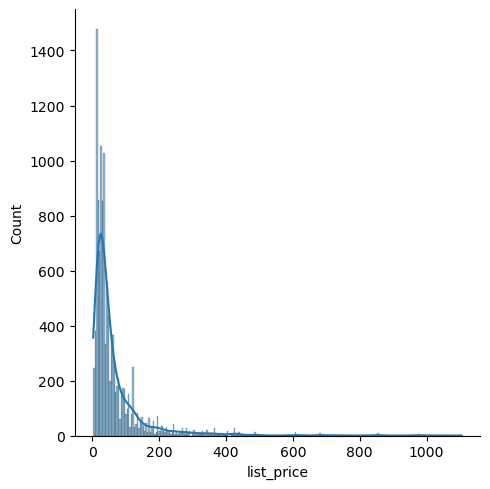

In [27]:
plt.figure(figsize=(16, 12))
sns.displot(x = 'list_price', data = lego_df, kde=True)
plt.show()

In [28]:
lego_df["list_price"].describe()

count    12261.000000
mean        65.141998
std         91.980429
min          2.272400
25%         19.990000
50%         36.587800
75%         70.192200
max       1104.870000
Name: list_price, dtype: float64

<Axes: xlabel='list_price'>

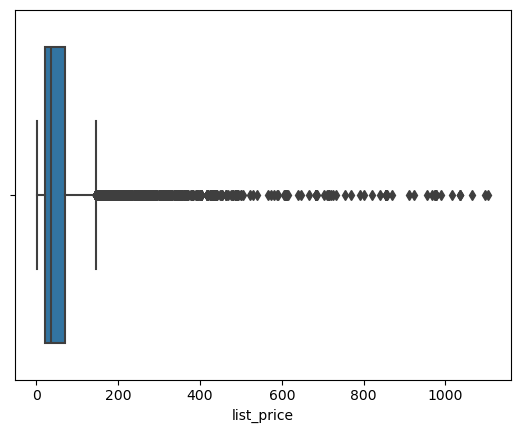

In [29]:
sns.boxplot(x = 'list_price', data = lego_df)

In [30]:
lego_df["list_price"].median()

36.5878

The min value of list_price is 2.27, the max value is 1104, whereas the mean is 65 and the median is 36 (mean is to the right of median).
75% of the values are lower than 71 USD. This data is skewed right, with most of outliers being towards the right side of the chart.

This analysis can be performed for particular regions.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


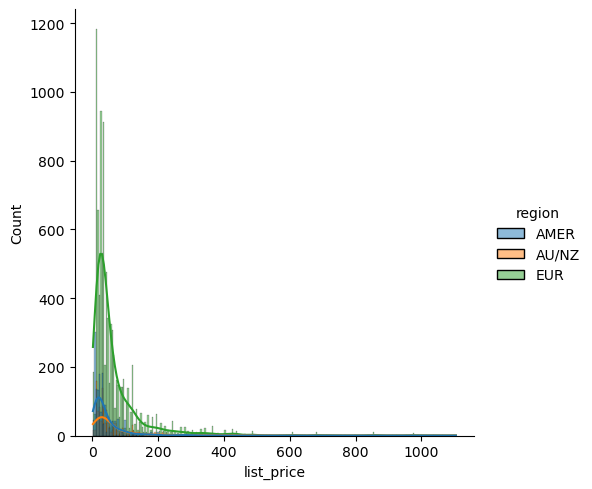

In [31]:
sns.displot(x = 'list_price', data = lego_df, kde=True, hue="region")

It is visible that the distribution for each region has different characteristics. We can explore the values further by grouping them.
Using numpy, we will also calculate the standard deviations for regions.

In [32]:
def std(x): 
    return np.std(x)

In [33]:
lego_df.groupby('region').agg(avg_price=('list_price','mean'),
                       price_median=('list_price','median'),
                       price_min=('list_price','min'),
                       price_max=('list_price','max'), 
                    price_std=('list_price',std), 
                       count=('list_price','count')).reset_index()

,region,avg_price,price_median,price_min,price_max,price_std,count
0,AMER,46.161864,24.9900,2.3322,799.9900,67.808482,1632
1,AU/NZ,65.852313,35.4929,2.2724,1064.9929,94.263165,1135
2,EUR,68.319729,36.5878,2.4000,1104.8700,94.871172,9494


It is to be noted than 77% of the base dataset refers to European countries. The average price is the lowest in US.
In all cases, the mean is on the right side of the median. This is also a sign of right-skewed data. This step will be repeated for particular countries.

In [34]:
lego_df.groupby('country').agg(avg_price=('list_price','mean'),
                       price_median=('list_price','median'),
                       price_min=('list_price','min'),
                       price_max=('list_price','max'), 
                        price_std=('list_price',std),
                       count=('list_price','count')).reset_index()

,country,avg_price,price_median,price_min,price_max,price_std,count
0,AT,64.472757,36.5878,3.0378,975.9878,91.298431,575
1,AU,62.283293,34.1924,2.2724,987.9924,87.544982,570
2,BE,69.229288,36.5878,3.0378,1035.7800,96.550108,566
3,CA,45.068505,23.3922,2.3322,701.9922,63.567470,815
4,CH,64.662774,35.5980,2.9580,967.9800,92.953209,568
5,CZ,72.258186,38.3520,3.3120,955.2000,99.040571,549
6,DE,69.188933,36.5878,3.0378,974.7800,95.901226,549
7,DN,55.477357,30.0000,2.4000,839.8800,74.326330,575
8,ES,69.188933,36.5878,3.0378,974.7800,95.901226,549
9,FI,77.791533,42.6390,3.5990,1097.9390,104.189183,549


In all cases, the mean is on the right side of the median. This is also a sign of right-skewed data. The minimum price ranges from 2 to 3.5 in all cases. The maximal price changes from 701 in Canada to 1104 in Norway. It would be worth further investigation to determine the reasons for such pricing.

Further analysis will investigate the relationships between price and other components.


Relationship between price and user age

<Axes: xlabel='list_price', ylabel='minimum_age'>

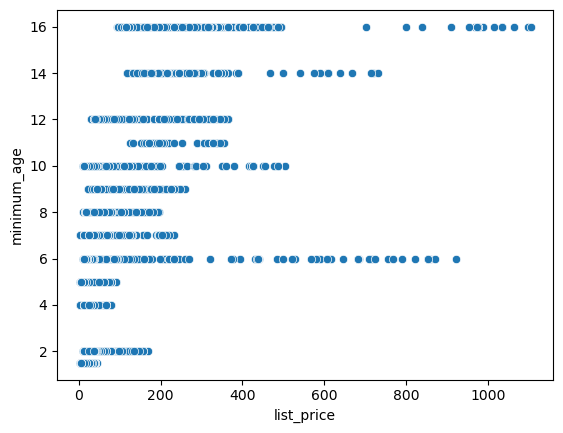

In [35]:
sns.scatterplot(data=lego_df, x="list_price", y="minimum_age")

<Axes: xlabel='list_price', ylabel='minimum_age'>

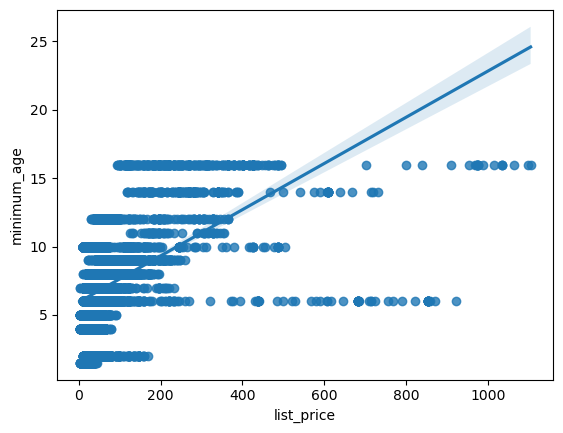

In [36]:
sns.regplot(data=lego_df, x="list_price", y="minimum_age")

<Axes: xlabel='list_price', ylabel='minimum_age'>

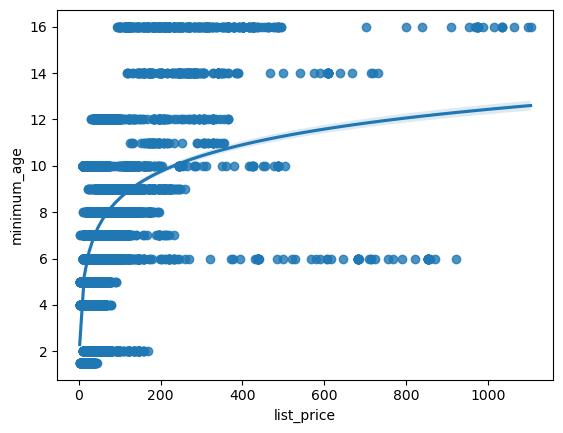

In [37]:
sns.regplot(data=lego_df, x="list_price", y="minimum_age",logx=True)

The plots suggest that there is a positive relationship between the price and minimal age of the user. This will be investigated later.

<Axes: xlabel='list_price', ylabel='piece_count'>

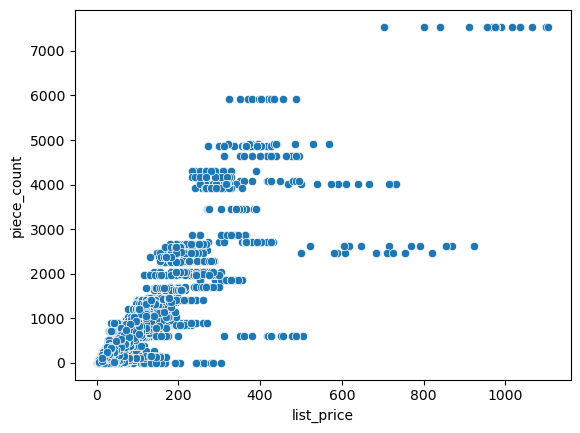

In [38]:
sns.scatterplot(data=lego_df, x="list_price", y="piece_count")

<Axes: xlabel='list_price', ylabel='piece_count'>

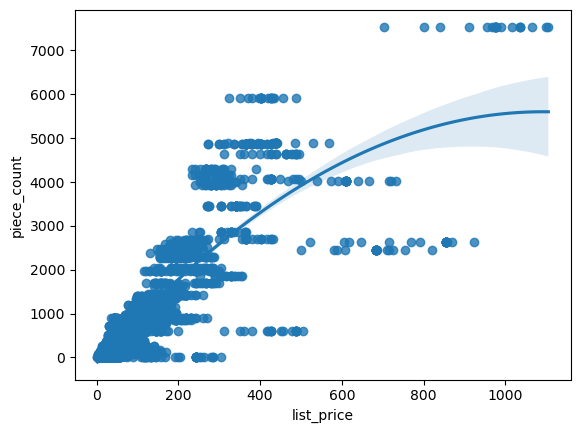

In [39]:
sns.regplot(data=lego_df, x="list_price", y="piece_count", order=2)

The plots suggest that there is a positive relationship between the price and piece count of the user. 
The relationship appears to be stronger than the relationship between price/user min. age. This will be investigated later.

Another factor to be taken into consideration is number of reviews. The high number of reviews suggest high interest among customers.

<Axes: xlabel='list_price', ylabel='num_reviews'>

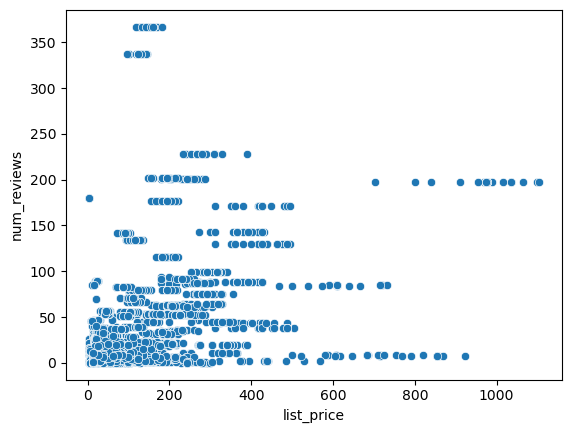

In [40]:
sns.scatterplot(data=lego_df, x="list_price", y="num_reviews")

<Axes: xlabel='list_price', ylabel='num_reviews'>

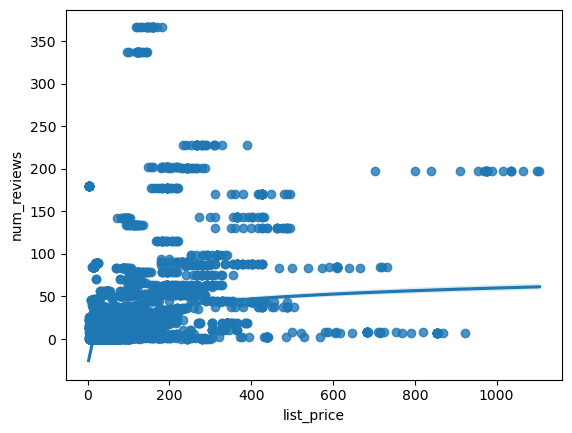

In [41]:
sns.regplot(data=lego_df, x="list_price", y="num_reviews", logx=True)

The relationship between price and number of reviews seems to be positive, but weaker than 2 previously identified relationships.
Another aspect to be taken into consideration is the length of the description (the description is prepared by company's marketing team. Longer description may suggest more active promotion).

<Axes: xlabel='list_price', ylabel='description_length'>

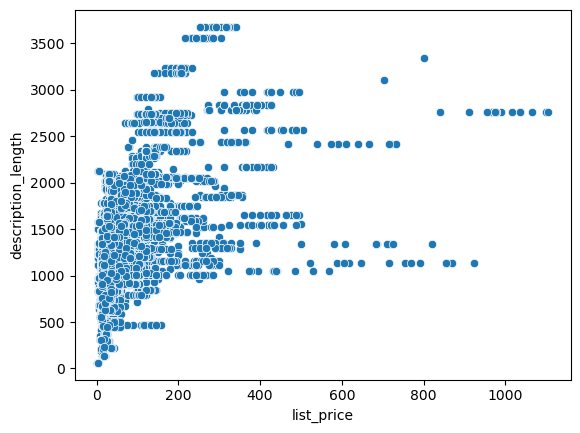

In [42]:
sns.scatterplot(data=lego_df, x="list_price", y="description_length")

<Axes: xlabel='list_price', ylabel='description_length'>

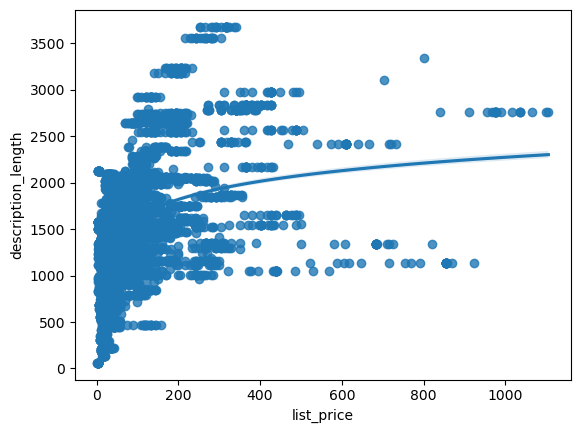

In [43]:
sns.regplot(data=lego_df, x="list_price", y="description_length", logx=True)

Again, the relationship between description and list_price seems to be positive, but not as strong as relationship between price and number of pieces/minimum age.

The correlation between list_price, piece_count,description length and minimum age will be investigated further.



In [44]:
lego_df.corr(numeric_only = True)

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,description_length,minimum_age,difficulty_level
list_price,1.000000,0.459442,0.869630,0.030027,0.001544,-0.047078,0.455286,0.500352,0.502269
num_reviews,0.459442,1.000000,0.556345,-0.037705,0.007111,0.026795,0.163593,0.523390,0.331242
piece_count,0.869630,0.556345,1.000000,0.022386,0.073903,0.076673,0.477020,0.636503,0.553776
play_star_rating,0.030027,-0.037705,0.022386,1.000000,0.608193,0.480938,0.098097,-0.187541,0.114336
star_rating,0.001544,0.007111,0.073903,0.608193,1.000000,0.727890,0.081357,0.055665,0.071845
val_star_rating,-0.047078,0.026795,0.076673,0.480938,0.727890,1.000000,0.039898,0.039631,0.085876
description_length,0.455286,0.163593,0.477020,0.098097,0.081357,0.039898,1.000000,0.287243,0.473163
minimum_age,0.500352,0.523390,0.636503,-0.187541,0.055665,0.039631,0.287243,1.000000,0.497877
difficulty_level,0.502269,0.331242,0.553776,0.114336,0.071845,0.085876,0.473163,0.497877,1.000000


There is a strong positive correlation between the price and the piece count.
There correlation between minimum_age, number of reviews and description_length is positive and moderately strong.

The analysis for ratings would be calculated for additional set lego_df_rankings.

In [45]:
lego_df_rankings.corr(numeric_only=True)

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,description_length,minimum_age,difficulty_level
list_price,1.000000,0.447590,0.867464,0.034618,0.007865,-0.044344,0.473663,0.512948,0.501870
num_reviews,0.447590,1.000000,0.544465,-0.032336,0.015368,0.030277,0.170439,0.539825,0.330726
piece_count,0.867464,0.544465,1.000000,0.028930,0.082285,0.081253,0.499877,0.656615,0.553322
play_star_rating,0.034618,-0.032336,0.028930,1.000000,0.609530,0.485509,0.093881,-0.195155,0.115798
star_rating,0.007865,0.015368,0.082285,0.609530,1.000000,0.728858,0.095432,0.057096,0.072410
val_star_rating,-0.044344,0.030277,0.081253,0.485509,0.728858,1.000000,0.049171,0.044826,0.086240
description_length,0.473663,0.170439,0.499877,0.093881,0.095432,0.049171,1.000000,0.374966,0.473827
minimum_age,0.512948,0.539825,0.656615,-0.195155,0.057096,0.044826,0.374966,1.000000,0.498952
difficulty_level,0.501870,0.330726,0.553322,0.115798,0.072410,0.086240,0.473827,0.498952,1.000000


It seems that the correlation between list_price and ratings (play_star_rating, star_rating, val_star_rating) is very weak. It suggests that the user ratings may not be taken into consideration during the price determination. 

The relationship between list_price and difficulty level is positive and moderately strong.

<Axes: xlabel='list_price', ylabel='play_star_rating'>

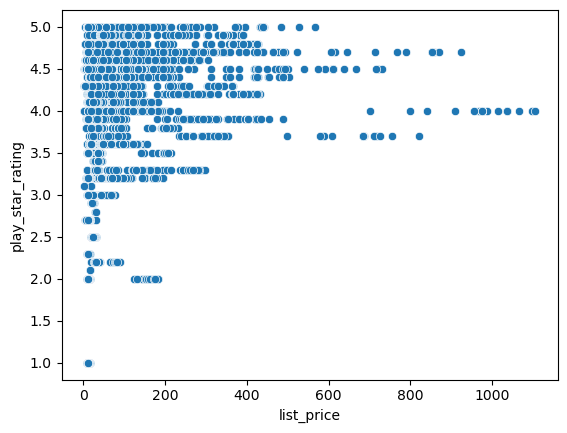

In [46]:
sns.scatterplot(data=lego_df_rankings, x="list_price", y="play_star_rating")

<Axes: xlabel='list_price', ylabel='play_star_rating'>

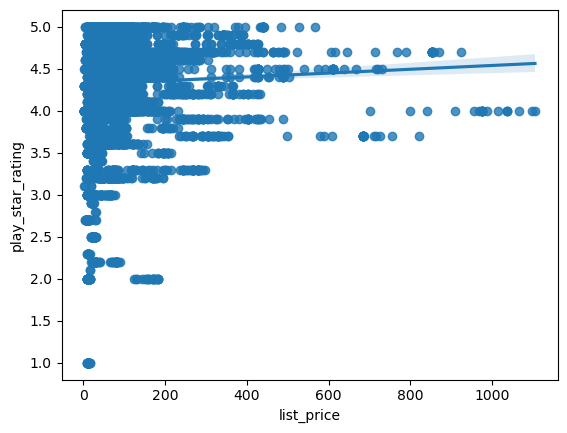

In [47]:
sns.regplot(data=lego_df_rankings, x="list_price", y="play_star_rating")

In [ ]:
sns.regplot(data=lego_df_rankings, x="list_price", y="star_rating")

In [ ]:
sns.regplot(data=lego_df_rankings, x="list_price", y="val_star_rating")

In [ ]:
sns.regplot(data=lego_df_rankings, x="list_price", y="difficulty_level")

# 5. Key findings and recommendations

The strongest factor influencing the set price is the piece count (0.86 correlation). However, it needs to be noted that the lego pieces differ in shapes and sizes, ranging from small bricks to much larger base-plate bricks. It is also worth remembering that some pieces are more valuable to customers, for instance due to their uniqueness.
It would be worth investigating whether the best basis for the price would be the weight of the box or the inclusion of the most valuable pieces for customers.

Additionally, it seems that the ratings have no influence on the product price, which may suggest that the company does not make a detailed investigation of customers' tastes and opinions.

In the future, it would be beneficial to analyse not only the prices of data_set, but their popularity and the popularity of the popular pieces.

Using the actual data, it would be possible to build more detailed models (e.g. regression models) between various variables affecting the price.
It would be also possible to create more detailed analysis for the particular lego themes.

It would be strongly recommended to provide detailed data on the sales of lego sets, containing the data from a timespan of 5-10 years to identify the current sales trend and create a prognosis for future sales.

The analysis could be enhanced by data that is more actual.
Currently, the data is limited to several countries, it would be recommended to gather similar data for countries from all over the world.